# Corpus Statistics - Lab

## Introduction

In this lab, we'll learn how to use various NLP techniques to generate descriptive statistics to explore a text corpus!

## Objectives

You will be able to:

* Generate common corpus statistics using NLTK
* Tokenize and preprocess a text document to create a Bag of Words using NLTK
* Compare two different text corpora using corpus statistics generated by NLTK

## Getting Started

In this lab, we'll load two different text corpora from NLTK's library of various texts, and then explore and compare each corpus using some basic statistical measures and techniques common in NLP. Let's get started!

In the cell below:

* Import `nltk`
* Import `gutenberg` and `stopwords` from `nltk.corpus`
* Import everything (`*`) from `nltk.collocations`
* Import `FreqDist` and `word_tokenize` from `nltk`
* Import the `string` and `re` libraries

In [1]:
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk.collocations import *
from nltk import FreqDist, word_tokenize
import string
import re

Now, let's take a look at the corpora available to us. There are many, many corpora available inside of nltk's `corpus` module. For this lab, we'll make use of the texts contained with `corpus.gutenberg`-- 18 different (complete) corpora that can be found on the [Project Gutenberg](https://www.gutenberg.org/) website. 

To see the file ids for each of the corpora inside of `gutenberg`, we can call the `.fileids()` method. Do this now in the cell below.

In [4]:
#nltk.download('gutenberg')
file_ids = gutenberg.fileids()
file_ids

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\IBM\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

Great! For the first part of this lab, we'll be working with Shakespeare's _Macbeth_, a lighthearted romantic comedy about a pair of ambitious social climbers. 

To load the actual corpus, we need to pass in the file id for macbeth into `gutenberg.raw()`. 

Do this now in the cell below.  Then, print the first 1000 characters of the text to ensure it loaded correctly, and get a feel for what our text data looks like.

In [5]:
macbeth_text = gutenberg.raw(file_ids[-2])
print(macbeth_text[:1000])

[The Tragedie of Macbeth by William Shakespeare 1603]


Actus Primus. Scoena Prima.

Thunder and Lightning. Enter three Witches.

  1. When shall we three meet againe?
In Thunder, Lightning, or in Raine?
  2. When the Hurley-burley's done,
When the Battaile's lost, and wonne

   3. That will be ere the set of Sunne

   1. Where the place?
  2. Vpon the Heath

   3. There to meet with Macbeth

   1. I come, Gray-Malkin

   All. Padock calls anon: faire is foule, and foule is faire,
Houer through the fogge and filthie ayre.

Exeunt.


Scena Secunda.

Alarum within. Enter King Malcome, Donalbaine, Lenox, with
attendants,
meeting a bleeding Captaine.

  King. What bloody man is that? he can report,
As seemeth by his plight, of the Reuolt
The newest state

   Mal. This is the Serieant,
Who like a good and hardie Souldier fought
'Gainst my Captiuitie: Haile braue friend;
Say to the King, the knowledge of the Broyle,
As thou didst leaue it

   Cap. Doubtfull it stood,
As two spent Swimmers, t

**_Question:_**  Look at the text snippet above. What do you notice about it? Are there are issues you see that we'll need to deal with during the preprocessing steps?

Write your answer below this line:
_______________________________________________________________________________
In the text snippet above there are issues we'll need to deal with during the preprocessing steps. There are capital words, punctuation, hyphenated words, and numbers indicating the speaker to contend with. There is also scene information and stage directions that we may or may not want to keep.

### Preprocessing the Data

Looking at the text output above shows us a few things that we'll need to deal with during the preprocessing and tokenization steps--specifically:

* Capitalization--we'll need to lowercase all words. 
* Apostrophes--we'll need to write some basic regex in order to capture words that contain apostrophes as a single token. In the interest of time, a pattern has been provided for you. Use the following pattern:  `"([a-zA-Z]+(?:'[a-z]+)?)"`
* Numbers--We'll want to remove these, as they generally appear as stage direction to tell us which witch is speaking. 

In the cell below:

* Store the pattern shown above in the appropriate variable. 
* Use `nltk.regex_tokenize` and pass in our text, and the `pattern`

In [6]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
macbeth_tokens_raw = nltk.regexp_tokenize(macbeth_text, pattern)

Great! Now that we have our tokens, we need to lowercase them. In the cell below, use a list comprehension and the `.lower()` method on every word token in `macbeth_tokens`. Store this inside `macbeth_tokens`.

In [7]:
macbeth_tokens = [word.lower() for word in macbeth_tokens_raw]

## Frequency Distributions

Now that we've created done some basic cleaning and tokenization, let's go ahead and create a **_Frequency Distribution_** to see the number of times each word is used in this play. This frequency distribution is an example of a **_Bag of Words_**, which you've worked with in previous labs. 

In the cell below:

* Create a `FreqDist` and pass in `macbeth_tokens` as the input.
* Display the frequency distribution to see what it looks like (jupyter will automatically truncate it for you)

In [8]:
macbeth_freqdist = FreqDist(macbeth_tokens)
macbeth_freqdist.most_common(50)

[('the', 649),
 ('and', 545),
 ('to', 383),
 ('of', 338),
 ('i', 331),
 ('a', 241),
 ('that', 227),
 ('my', 203),
 ('you', 203),
 ('in', 199),
 ('is', 180),
 ('not', 165),
 ('it', 161),
 ('with', 153),
 ('his', 146),
 ('be', 137),
 ('macb', 137),
 ('your', 126),
 ('our', 123),
 ('haue', 122),
 ('but', 120),
 ('me', 113),
 ('he', 110),
 ('for', 109),
 ('what', 106),
 ('this', 104),
 ('all', 99),
 ('so', 96),
 ('him', 90),
 ('as', 89),
 ('thou', 87),
 ('we', 83),
 ('enter', 81),
 ('which', 80),
 ('are', 73),
 ('will', 72),
 ('they', 70),
 ('shall', 68),
 ('no', 67),
 ('then', 63),
 ('macbeth', 62),
 ('their', 62),
 ('thee', 61),
 ('vpon', 58),
 ('on', 58),
 ('macd', 58),
 ('from', 57),
 ('yet', 57),
 ('thy', 56),
 ('vs', 55)]

Well, that doesn't tell us very much! The top 10 most used words in macbeth are all **_Stop Words_**. They don't contain any interesting information, and essentially just act as the "connective tissue" between the words that really matter in any text. Let's try removing the stopwords and punctuation, and then creating another another frequency distribution that contains only the important words. 

## Removing Stop Words and Punctuation

We've already imported the `stopwords` module. We can access all of the stopwords using the `stopwords.words()` method--however, we don't want to use the whole thing, as this contains all stopwords in every language supported by NLTK. We don't need to check for check for and remove any Finnish or Japanese stop words, as this text is in English. To avoid unnecessarily long runtimes, we'll just use the English subset of stopwords by passing in the parameter `"english"` into `stopwords.words()`.

In the cell below:

* Get all the `'english'` stopwords from `stopwords.words()` and store them in the appropriate variable below. They will be stored as a list, by default. 
* We'll also want to remove all punctuation. Create a list version of `string.punctuation` and add it to our stopwords list. 
* Finally, we'll also remove numbers. Create a list that contains numbers 0-9 (as strings!), and add this to the stopwords list as well. 
* Use another list comprehension to get words out of `macbeth_tokens` as long as they are not in `stopwords_list`.

In [10]:
#nltk.download('stopwords')
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

macbeth_words_stopped = [word for word in macbeth_tokens if word not in stopwords_list]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IBM\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Great! Now, let's create another frequency distribution using `macbeth_words_stopped`, and then inspect the top 50 most common words, to see if removing stopwords and punctuation has helped. 

Do this now in the cell below.

In [11]:
macbeth_stopped_freqdist = FreqDist(macbeth_words_stopped)
macbeth_stopped_freqdist.most_common(50)

[('macb', 137),
 ('haue', 122),
 ('thou', 87),
 ('enter', 81),
 ('shall', 68),
 ('macbeth', 62),
 ('thee', 61),
 ('vpon', 58),
 ('macd', 58),
 ('yet', 57),
 ('thy', 56),
 ('vs', 55),
 ('come', 54),
 ('king', 54),
 ('hath', 52),
 ('good', 49),
 ('rosse', 49),
 ('lady', 48),
 ('would', 47),
 ('time', 46),
 ('like', 43),
 ('say', 39),
 ('doe', 38),
 ('lord', 38),
 ('make', 38),
 ('tis', 37),
 ('must', 36),
 ('done', 35),
 ('selfe', 35),
 ('ile', 35),
 ('feare', 35),
 ('let', 35),
 ('man', 34),
 ('wife', 34),
 ('night', 34),
 ('banquo', 34),
 ('well', 33),
 ('know', 33),
 ('one', 32),
 ('great', 31),
 ('see', 31),
 ('may', 31),
 ('exeunt', 30),
 ('speake', 29),
 ('sir', 29),
 ('lenox', 28),
 ('mine', 26),
 ('vp', 26),
 ('th', 26),
 ('mal', 25)]

This is definitely an improvement! You may be wondering why `'Macb'` shows up as the number 1 most used token. If you inspect [Macbeth](http://www.gutenberg.org/cache/epub/1795/pg1795-images.html) on project gutenberg and search for `'Macb'`, you'll soon discover that the source text denotes `Macb` as stage direction for any line spoken by Macbeth's character. This means that `'Macb'` is actually stage direction, meaning that under normal circumstances, we would need to ask ourselves if it is worth it to remove it or keep it. In the interest of time for this lab, we'll leave it be. 

## Answering Questions about our Corpus

Now that we have a Frequency Distribution, we can easily answer some basic questions about the text. Let's answer some basic questions about Macbeth below, before we move onto creating bigrams. 

### Vocabulary Size

what is size of the total vocabulary used in Macbeth, once all stopwords have been removed?

Compute this in the cell below. 

In [12]:
len(macbeth_stopped_freqdist)

3441

### Normalized Word Frequency

Knowing the frequency with which each word is used is somewhat informative, but without the context of how many words are in used in total, it doesn't tell us much. One way we can adjust for this is to use **_Normalized Word Frequency_**, which we can compute by dividing each word frequency by the total number of words. 

Compute this now in the cell below, and display the normalized word frequency for the top 50 words. 

In [19]:
total_word_count = sum(macbeth_stopped_freqdist.values())
macbeth_top_50 = macbeth_stopped_freqdist.most_common(50)
print("Word\t\t\tNormalized Frequency")
for word in macbeth_top_50:
    normalized_frequency = word[1] / total_word_count
    print("{} \t\t\t {:.4}".format(word[0], normalized_frequency))

Word			Normalized Frequency
macb 			 0.01354
haue 			 0.01206
thou 			 0.008601
enter 			 0.008008
shall 			 0.006723
macbeth 			 0.00613
thee 			 0.006031
vpon 			 0.005734
macd 			 0.005734
yet 			 0.005635
thy 			 0.005536
vs 			 0.005437
come 			 0.005339
king 			 0.005339
hath 			 0.005141
good 			 0.004844
rosse 			 0.004844
lady 			 0.004745
would 			 0.004647
time 			 0.004548
like 			 0.004251
say 			 0.003856
doe 			 0.003757
lord 			 0.003757
make 			 0.003757
tis 			 0.003658
must 			 0.003559
done 			 0.00346
selfe 			 0.00346
ile 			 0.00346
feare 			 0.00346
let 			 0.00346
man 			 0.003361
wife 			 0.003361
night 			 0.003361
banquo 			 0.003361
well 			 0.003262
know 			 0.003262
one 			 0.003164
great 			 0.003065
see 			 0.003065
may 			 0.003065
exeunt 			 0.002966
speake 			 0.002867
sir 			 0.002867
lenox 			 0.002768
mine 			 0.00257
vp 			 0.00257
th 			 0.00257
mal 			 0.002472


## Creating Bigrams

Knowing individual word frequencies is somewhat informative, but in practice, some of these tokens are actually parts of larger phrases that should be treated as a single unit. Let's create some bigrams, and see which combinations of words are most telling. 

In the cell below:

* We'll begin by aliasing a particularly long method name to make it easier to call. Store `nltk.collocations.BigramAssociationMeasures()` inside of the variable `bigram_measures`.
* Next, we'll need to create a **_finder_**. Pass `macbeth_words_stopped` into `BigramCollocationFinder.from_words()` and store the result returned inside of `macbeth_finder`.
* Once we have a finder, we can use it to compute bigram scores, so we can see the combinations that occur most frequently. Call the `macbeth_finder` object's `score_ngrams()` method and pass in `bigram_measures.raw_freq` as the input. 
* Display first 50 elements in the `macbeth_scored` list to see the 50 most common bigrams in macbeth. 

In [20]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [21]:
macbeth_finder = BigramCollocationFinder.from_words(macbeth_words_stopped)

In [22]:
macbeth_scored = macbeth_finder.score_ngrams(bigram_measures.raw_freq)

In [23]:
macbeth_scored[:50]

[(('enter', 'macbeth'), 0.0015818091942659417),
 (('exeunt', 'scena'), 0.0014829461196243204),
 (('thane', 'cawdor'), 0.0012852199703410777),
 (('knock', 'knock'), 0.0009886307464162135),
 (('lord', 'macb'), 0.0008897676717745922),
 (('thou', 'art'), 0.0008897676717745922),
 (('good', 'lord'), 0.0007909045971329708),
 (('haue', 'done'), 0.0007909045971329708),
 (('macb', 'haue'), 0.0007909045971329708),
 (('enter', 'lady'), 0.0006920415224913495),
 (('let', 'vs'), 0.0006920415224913495),
 (('macbeth', 'macb'), 0.0005931784478497281),
 (('enter', 'malcolme'), 0.0004943153732081067),
 (('enter', 'three'), 0.0004943153732081067),
 (('euery', 'one'), 0.0004943153732081067),
 (('macb', 'ile'), 0.0004943153732081067),
 (('macb', 'thou'), 0.0004943153732081067),
 (('make', 'vs'), 0.0004943153732081067),
 (('mine', 'eyes'), 0.0004943153732081067),
 (('mine', 'owne'), 0.0004943153732081067),
 (('scena', 'secunda'), 0.0004943153732081067),
 (('three', 'witches'), 0.0004943153732081067),
 (('thy'

These look a bit more interesting. We can see here that some of the most common ones are stage directions, such as 'Enter Macbeth' and 'Exeunt Scena', while others seem to be common phrases used in the play. 

To wrap up our initial examination of _Macbeth_, let's end by calculating **_Mutual Information Scores_**.

## Using Mutual Information Scores

To calculate Mutual Information Scores, we'll need to first create a frequency filter, so that we only examine bigrams that occur more than a set number of times--for our purposes, we'll set this limit to 5. 

In NLTK, mutual information is often referred to as `pmi`, for **_Pointwise Mutual Information_**. Calculating PMI scores works much the same way that we created bigrams, with a few notable differences.

In the cell below:

* We'll start by creating another finder for pmi. Create another `BigramCollocationFinder.from_words` and pass in `macbeth_words_stopped` as the input. Store this is the variable `macbeth_pmi_finder`.
* Once we have our finder, we'll need to apply our frequency filter. Call `macbeth_pmi_finder`'s `apply_freq_filter` and pass in the number `5` as the input. 
* Now, we can use the finder to calculate pmi scores. Use the pmi finder's `.score_ngrams()` function, and pass in `bigram_measures.pmi` as the argument. Store this in `macbeth_pmi_scored`.
* Examine the first 50 elements in `macbeth_pmi_scored`.

In [24]:
macbeth_pmi_finder = BigramCollocationFinder.from_words(macbeth_words_stopped)

In [25]:
macbeth_pmi_finder.apply_freq_filter(5)

In [26]:
macbeth_pmi_scored = macbeth_pmi_finder.score_ngrams(bigram_measures.pmi)

In [27]:
macbeth_pmi_scored

[(('three', 'witches'), 8.925697076191916),
 (('scena', 'secunda'), 8.844777080808349),
 (('knock', 'knock'), 8.62613679433301),
 (('thane', 'cawdor'), 7.968474805033251),
 (('exeunt', 'scena'), 7.844777080808349),
 (('mine', 'eyes'), 7.46626545755462),
 (('worthy', 'thane'), 6.982280604558284),
 (('mine', 'owne'), 6.838234234941577),
 (('euery', 'one'), 6.626136794333009),
 (('thou', 'art'), 5.861265203596917),
 (('enter', 'malcolme'), 5.585847073307292),
 (('enter', 'three'), 5.585847073307292),
 (('good', 'lord'), 5.441571341886851),
 (('let', 'vs'), 5.2009208910336255),
 (('enter', 'macbeth'), 5.0101623861741444),
 (('thy', 'selfe'), 4.689498855330438),
 (('make', 'vs'), 4.596849567364764),
 (('haue', 'done'), 4.2441883449377915),
 (('enter', 'lady'), 4.186751117897471),
 (('lord', 'macb'), 4.128174104483847),
 (('macb', 'ile'), 3.3988216944275145),
 (('would', 'haue'), 3.1408106050924847),
 (('macbeth', 'macb'), 2.836942806819401),
 (('macb', 'haue'), 2.2754392789222315),
 (('macb

## On Your Own: Comparative Corpus Statistics

Now that we've worked through generating some baseline corpus statistics for one corpus, it's up to you to select a second corpus and generate your own corpus statistics, and then compare and contrast the two. For simplicity's sake, we recommend you stick to a corpus from `nltk.corpus.gutenberg`--although comparing the diction found in a classic work of fiction to something like a presidential State of the Union address could be interesting, it's not really an apples-to-apples comparison, and those corpora could also require additional preprocessing steps that are outside the scope of this lab. 

In the cells below:

1. Select another corpus from `gutenberg.fileids()`.  
<br>  
2. Clean, preprocess, tokenize, and generate corpus statistics for this new corpus.   
<br>   
3. Perform a comparative analysis using the Macbeth statistics we generated above and your new corpus statistics. How are they similar? How are they different? Was there anything interesting or surprising that you found in your comparison? Create at least 1 meaningful visualization comparing the two corpora.

In [28]:
#Look at available corpus
file_ids

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [29]:
#Select Hamlet due to most straight-forward comparison
hamlet_text = gutenberg.raw(file_ids[-3])
print(hamlet_text[:1000])

[The Tragedie of Hamlet by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Barnardo and Francisco two Centinels.

  Barnardo. Who's there?
  Fran. Nay answer me: Stand & vnfold
your selfe

   Bar. Long liue the King

   Fran. Barnardo?
  Bar. He

   Fran. You come most carefully vpon your houre

   Bar. 'Tis now strook twelue, get thee to bed Francisco

   Fran. For this releefe much thankes: 'Tis bitter cold,
And I am sicke at heart

   Barn. Haue you had quiet Guard?
  Fran. Not a Mouse stirring

   Barn. Well, goodnight. If you do meet Horatio and
Marcellus, the Riuals of my Watch, bid them make hast.
Enter Horatio and Marcellus.

  Fran. I thinke I heare them. Stand: who's there?
  Hor. Friends to this ground

   Mar. And Leige-men to the Dane

   Fran. Giue you good night

   Mar. O farwel honest Soldier, who hath relieu'd you?
  Fra. Barnardo ha's my place: giue you goodnight.

Exit Fran.

  Mar. Holla Barnardo

   Bar. Say, what is Horatio there?
  Hor. A peece of

In [30]:
#Pre-process Data: remove apostorphes and capitals
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
hamlet_tokens_raw = nltk.regexp_tokenize(hamlet_text, pattern)
hamlet_tokens = [word.lower() for word in hamlet_tokens_raw]
hamlet_freqdist = FreqDist(hamlet_tokens)
hamlet_freqdist.most_common(50)

[('the', 993),
 ('and', 862),
 ('to', 683),
 ('of', 610),
 ('i', 547),
 ('you', 522),
 ('a', 509),
 ('my', 502),
 ('it', 415),
 ('in', 384),
 ('that', 361),
 ('ham', 337),
 ('is', 315),
 ('not', 300),
 ('his', 285),
 ('this', 275),
 ('with', 254),
 ('your', 253),
 ('but', 249),
 ('for', 241),
 ('me', 228),
 ('lord', 211),
 ('as', 205),
 ('what', 200),
 ('he', 196),
 ('be', 192),
 ('so', 189),
 ('him', 178),
 ('haue', 175),
 ('king', 171),
 ('will', 149),
 ('no', 137),
 ('our', 130),
 ('we', 128),
 ('on', 123),
 ('are', 121),
 ('if', 111),
 ('all', 109),
 ('then', 108),
 ('shall', 107),
 ('by', 105),
 ('thou', 105),
 ('come', 104),
 ('or', 103),
 ('hamlet', 100),
 ('good', 98),
 ('do', 96),
 ('hor', 95),
 ('her', 95),
 ('let', 94)]

In [31]:
#Pre-process Data: remove stop words, punctuation and numbers
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

hamlet_words_stopped = [word for word in hamlet_tokens if word not in stopwords_list]
hamlet_stopped_freqdist = FreqDist(hamlet_words_stopped)
hamlet_stopped_freqdist.most_common(50)

[('ham', 337),
 ('lord', 211),
 ('haue', 175),
 ('king', 171),
 ('shall', 107),
 ('thou', 105),
 ('come', 104),
 ('hamlet', 100),
 ('good', 98),
 ('hor', 95),
 ('let', 94),
 ('thy', 90),
 ('enter', 85),
 ('oh', 81),
 ('like', 80),
 ('well', 71),
 ('tis', 69),
 ('know', 69),
 ('selfe', 68),
 ('would', 68),
 ('loue', 66),
 ('may', 65),
 ('vs', 62),
 ('sir', 62),
 ('qu', 62),
 ('laer', 60),
 ('giue', 59),
 ('thee', 58),
 ('ile', 58),
 ('must', 58),
 ('hath', 57),
 ('ophe', 56),
 ('speake', 55),
 ('make', 54),
 ('say', 51),
 ('vpon', 50),
 ('father', 50),
 ('doe', 50),
 ('pol', 49),
 ('go', 48),
 ('one', 46),
 ('man', 46),
 ('see', 45),
 ('heere', 45),
 ('heauen', 44),
 ('time', 44),
 ('mine', 44),
 ('much', 43),
 ('tell', 43),
 ('rosin', 43)]

In [32]:
#Vocabulary Length
len(hamlet_stopped_freqdist)

4701

In [33]:
#Normalized Word Frequency
total_word_count = sum(hamlet_stopped_freqdist.values())
hamlet_top_50 = hamlet_stopped_freqdist.most_common(50)
print("Word\t\t\tNormalized Frequency")
for word in hamlet_top_50:
    normalized_frequency = word[1] / total_word_count
    print("{} \t\t\t {:.4}".format(word[0], normalized_frequency))

Word			Normalized Frequency
ham 			 0.02108
lord 			 0.0132
haue 			 0.01095
king 			 0.0107
shall 			 0.006693
thou 			 0.006568
come 			 0.006506
hamlet 			 0.006255
good 			 0.00613
hor 			 0.005943
let 			 0.00588
thy 			 0.00563
enter 			 0.005317
oh 			 0.005067
like 			 0.005004
well 			 0.004441
tis 			 0.004316
know 			 0.004316
selfe 			 0.004254
would 			 0.004254
loue 			 0.004129
may 			 0.004066
vs 			 0.003878
sir 			 0.003878
qu 			 0.003878
laer 			 0.003753
giue 			 0.003691
thee 			 0.003628
ile 			 0.003628
must 			 0.003628
hath 			 0.003566
ophe 			 0.003503
speake 			 0.003441
make 			 0.003378
say 			 0.00319
vpon 			 0.003128
father 			 0.003128
doe 			 0.003128
pol 			 0.003065
go 			 0.003003
one 			 0.002878
man 			 0.002878
see 			 0.002815
heere 			 0.002815
heauen 			 0.002752
time 			 0.002752
mine 			 0.002752
much 			 0.00269
tell 			 0.00269
rosin 			 0.00269


In [36]:
#Bigrams
bigram_measures = nltk.collocations.BigramAssocMeasures()
hamlet_finder = BigramCollocationFinder.from_words(hamlet_words_stopped)
hamlet_scored = hamlet_finder.score_ngrams(bigram_measures.raw_freq)
hamlet_scored[:50]

[(('lord', 'ham'), 0.004316276742149381),
 (('good', 'lord'), 0.0014387589140497936),
 (('enter', 'king'), 0.0009383210309020393),
 (('hamlet', 'ham'), 0.0009383210309020393),
 (('haue', 'seene'), 0.0006881020893281622),
 (('lord', 'hamlet'), 0.0006881020893281622),
 (('enter', 'hamlet'), 0.0006255473539346928),
 (('exeunt', 'enter'), 0.0006255473539346928),
 (('ham', 'oh'), 0.0006255473539346928),
 (('ham', 'sir'), 0.0005629926185412236),
 (('haue', 'heard'), 0.0005629926185412236),
 (('king', 'queene'), 0.0005629926185412236),
 (('lord', 'haue'), 0.0005629926185412236),
 (('ophe', 'lord'), 0.0005629926185412236),
 (('thou', 'hast'), 0.0005629926185412236),
 (('enter', 'polonius'), 0.0005004378831477543),
 (('fathers', 'death'), 0.0005004378831477543),
 (('ham', 'nay'), 0.0005004378831477543),
 (('hor', 'lord'), 0.0005004378831477543),
 (('lord', 'polon'), 0.0005004378831477543),
 (('dost', 'thou'), 0.000437883147754285),
 (('good', 'friends'), 0.000437883147754285),
 (('let', 'see'),

In [37]:
#Mutual Information Scores
hamlet_pmi_finder = BigramCollocationFinder.from_words(hamlet_words_stopped)
hamlet_pmi_finder.apply_freq_filter(5)
hamlet_pmi_scored = hamlet_pmi_finder.score_ngrams(bigram_measures.pmi)
hamlet_pmi_scored

[(('rosincrance', 'guildensterne'), 9.224981836067206),
 (('sit', 'downe'), 8.479094546726996),
 (('horatio', 'marcellus'), 7.6425932790098745),
 (('set', 'downe'), 7.505089755259942),
 (('fathers', 'death'), 7.472668277567562),
 (('dost', 'thou'), 6.598199159651424),
 (('wilt', 'thou'), 6.572203951118476),
 (('heauen', 'earth'), 6.434700427368542),
 (('exeunt', 'enter'), 6.353496576589885),
 (('enter', 'polonius'), 6.233202342872174),
 (('mine', 'owne'), 6.135855945594223),
 (('thou', 'art'), 6.05763077828872),
 (('good', 'friends'), 5.909238938396049),
 (('haue', 'heard'), 5.875880341449621),
 (('tis', 'true'), 5.718493393369133),
 (('haue', 'seene'), 5.650813785814847),
 (('thou', 'hast'), 5.612845935615827),
 (('enter', 'ghost'), 5.484741109868137),
 (('tell', 'vs'), 4.905988403695627),
 (('reynol', 'lord'), 4.864910561936323),
 (('let', 'see'), 4.72543434794753),
 (('shall', 'heare'), 4.590786171996578),
 (('enter', 'horatio'), 4.555130437759535),
 (('king', 'queene'), 4.431191641

In [97]:
import matplotlib.pyplot as plt
#import pandas as pd
plt.bar(hamlet_top_50, wordnormalized_frequency)
#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
#plt.scatter(range(len(hamlet_pmi_scored)), hamlet_pmi_scored, color='r')
#plt.scatter(macbeth_pmi_scored, boys_grades, color='g')
#ax.plot(hamlet_pmi_scored)
plt.xlabel('Grades Range')
plt.ylabel('Grades Scored')
plt.show()

NameError: name 'wordnormalized_frequency' is not defined

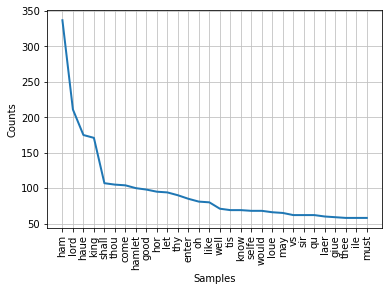

In [101]:
hamlet_stopped_freqdist.plot(30,cumulative=False)

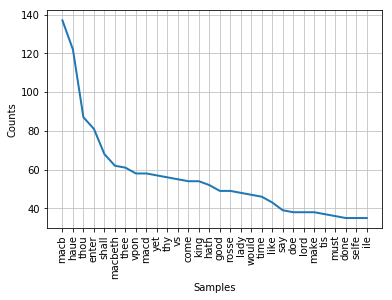

In [102]:
macbeth_stopped_freqdist.plot(30,cumulative=False)

After pre-processing (removal of apostrophes, capitals, stop words, punctuation and numbers), the vocabulary of Hamlet is 4,701 words compared with the slightly smaller vocabulary of Macbeth at 3,441 words. The normalized word frequency of the top word for Hamlet - 'ham' - is 0.02108; the normalized word frequency of the top word for Macbeth - 'macb' - is also a stage direction for the main character and is nearly half as much at 0.01354. The top bigram for Hamlet - ('lord', 'ham') - 0.00432; the top bigram for Macbeth - ('enter', 'macbeth') - also refers to the title character and has a score nearly one-third as large at 0.00158. The top pointwise mutual information score for Hamlet - ('rosincrance', 'guildensterne') - 9.225; the top pointwise mutual information score for Macbeth - ('three', 'witches') - is nearly as high at 8.926. From the frequency distribution plots we see that the words of Macbeth decline slower in frequency as compared with the words for Hamlet. Hamlet has a much larger gap between frequent and infrequent words. 

## Summary

In this lab, we used our newfound NLP skills to generate some statistics specific to text data, and used them to compare 2 different works! 